<a href="https://colab.research.google.com/github/ravilon/ufpel-pdi/blob/main/LAB10_Segmentacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB10 — Segmentação de Imagens

Disciplina: **Processamento Digital de Imagens (PDI)** – UFPel  
Professor: **Guilherme Corrêa**  

Vamos utilizar a imagem `leucocitos.jpg` como exemplo nos exercícios.

---

## **Objetivo Geral**

**O seu código deve encontrar os leucócitos na imagem e contá-los.**
Para auxiliar a análise morfológica manual, neste trabalho você deverá desenvolver um *script* que permita identificar e contar instâncias de leucócitos a partir de imagens de entrada que representam células sanguíneas. Os leucócitos são representados por regiões mais escuras (roxo escuro) e os glóbulos vermelhos são representados por regiões mais claras (roxo claro, vermelho fraco ou rosa).

## **Contexto**

A contagem e análise de células sanguíneas permite a avaliação e diagnóstico de um grande número de doenças, como leucemia e linfocitose. Em particular, a análise de leucócitos (também conhecidos como células brancas ou glóbulos brancos) é um tópico de grande interesse para hematologistas. Atualmente, na maioria dos casos, a análise e a contagem de leucócitos em imagens do sangue obtidas por microscópio são realizadas manualmente por hematologistas.

## **Dicas**
1. Você poderá usar quaisquer bibliotecas e funções que julgar necessárias.
2. Você pode usar algoritmos de segmentação, limiarização, processamento morfológico, conversão entre espaços de cores, filtros de média e mediana, etc.
3. A implementação e a entrega é individual, mas você pode trocar ideias com os colegas.
4. Filtro de mediana no OpenCV: `cv2.medianBlur(img, kernel)`
5. Limiarização com método de Otsu: `filters.threshold_otsu(img)`

## Bibliotecas úteis
Se estiver no Colab, rode a célula de instalação uma única vez.

In [149]:
# Se estiver no Colab, descomente a linha abaixo para garantir o OpenCV instalado
# !pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

## Upload de uma imagem

Vamos usar `files` do `google.colab` para fazer upload de uma imagem colorida e a biblioteca OpenCV (`cv2`) para abri-la.

Sugestão: utilizar a imagem `leucocitos.jpg`, que está disponível no repositório para os exercícios. A imagem está no formato RGB.

Faça upload de uma imagem (JPG/PNG).


Saving leucocitos.jpg to leucocitos (7).jpg


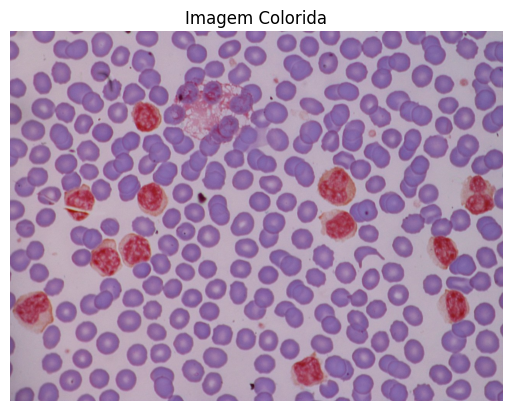

In [150]:
print("Faça upload de uma imagem (JPG/PNG).")
up = files.upload()
if not up:
    raise RuntimeError("Nenhum arquivo enviado.")

# Nome do arquivo
fname = next(iter(up))

# Ler imagem colorida (BGR)
img_rgb = cv2.imdecode(np.frombuffer(up[fname], np.uint8), cv2.IMREAD_COLOR)
if img_rgb is None:
    raise RuntimeError("Falha ao ler a imagem.")

# Mostrar
plt.imshow(img_rgb, vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem Colorida')
plt.show()

# Funções: Dilatação e Erosão

A seguir estamos apenas replicando as funções implementadas em lab anterior:
1. Função de Dilatação
2. Função de Erosão

*Note que nestes casos, os valores de testes das funções foram alterados de 255 para 0 para contemplar a imagem em questão, que quando binarizada ficará com fundo branco e elementos pretos (leucócitos) ao invés do oposto.*

In [162]:
def dilatacao(img, kernel):
    h, w = img.shape
    kh, kw = kernel.shape
    pad_h = kh // 2
    pad_w = kw // 2

    # imagem de saída inicializada com zeros
    out = np.zeros_like(img)

    # aplica padding
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    for i in range(h):
        for j in range(w):
            # extrai vizinhança
            region = padded[i:i+kh, j:j+kw]

            # se qualquer pixel da região onde o kernel é 1 for branco, o pixel vira branco
            if np.any(region[kernel == 1] == 0):
                out[i, j] = 0
            else:
                out[i, j] = 255

    return out

In [161]:
def erosao(img, kernel):
    h, w = img.shape
    kh, kw = kernel.shape
    pad_h = kh // 2
    pad_w = kw // 2

    out = np.zeros_like(img)

    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]

            # se todos os pixels da região onde kernel=1 forem brancos, mantém branco
            if np.all(region[kernel == 1] == 0):
                out[i, j] = 0
            else:
                out[i, j] = 255

    return out

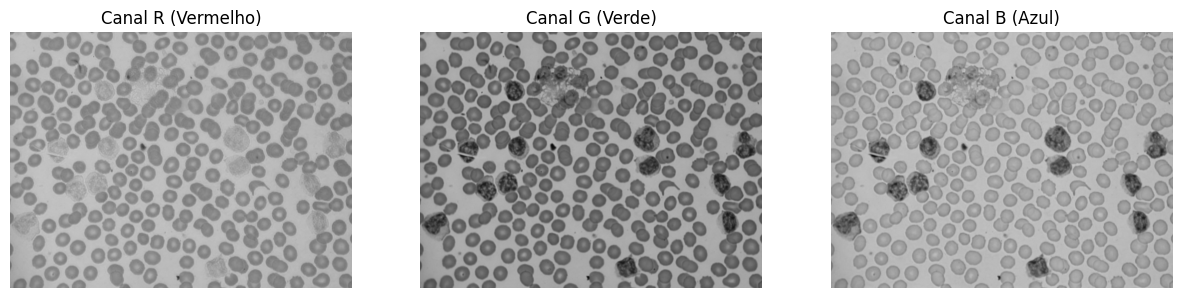

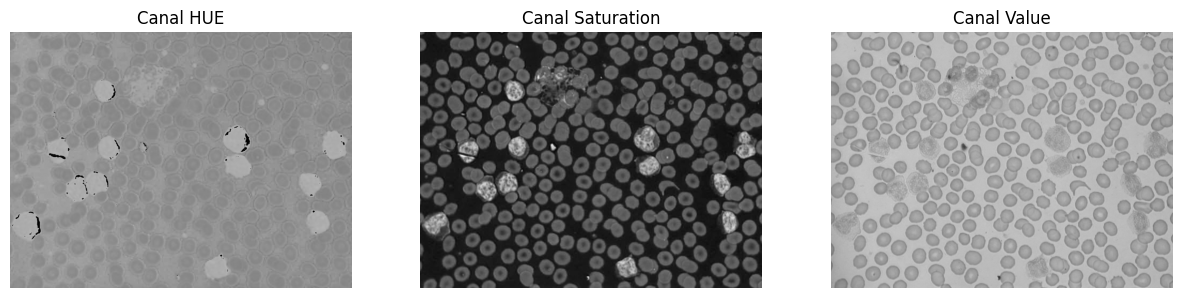

In [153]:
# Antes de separar os canais de cor, vamos aplicar um filtro de mediana/gaussian
blur = cv2.GaussianBlur(img_rgb, (5, 5), 1)

# Vamos separar os canais de cor para decidir qual vai ser mais fácil de encontrar as regiões conexas...
R, G, B = cv2.split(blur);

# Apresentar cada canal separadamente em escala de cinzas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(R, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Canal R (Vermelho)')

plt.subplot(1, 3, 2)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Canal G (Verde)')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Canal B (Azul)')
plt.show()

# Converte de RBG to HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
H, S, V = cv2.split(img_hsv);

# Apresentar cada canal separadamente em escala de cinzas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(H, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Canal HUE')

plt.subplot(1, 3, 2)
plt.imshow(S, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Canal Saturation')

plt.subplot(1, 3, 3)
plt.imshow(V, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Canal Value')
plt.show()


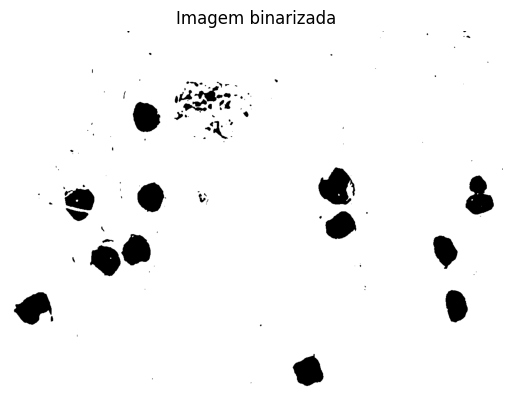

In [154]:
# Vamos aplicar a binarização (Tudo que está perto do preto vira preto, tudo que está perto do branco vira branco)
# No canal de cor do G - R
import cv2
import numpy as np
import matplotlib.pyplot as plt

canal = G - R;

# Binarização automática (Otsu)
# Como as células são mais escuras que o fundo, uso THRESH_BINARY_INV
_, bin_img = cv2.threshold(
    canal, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

plt.imshow(bin_img, cmap='gray')
plt.axis('off')
plt.title('Imagem binarizada')
plt.show()

In [172]:
# Aplicar erosão e depois dilatação.
# Definir um kernel para operações morfológicas (ex: 3x3 quadrado)
kernel_morph = np.ones((30,30), dtype=np.uint8)

# Aplicar uma operação de Abertura (Erosão seguida de Dilatação)
# para remover pequenos ruídos e suavizar contornos, mantendo a forma geral
eroded_B = erosao(bin_img, kernel_morph)
opened_B = dilatacao(eroded_B, kernel_morph)
opened_B = dilatacao(opened_B, np.ones((15,15), dtype=np.uint8))

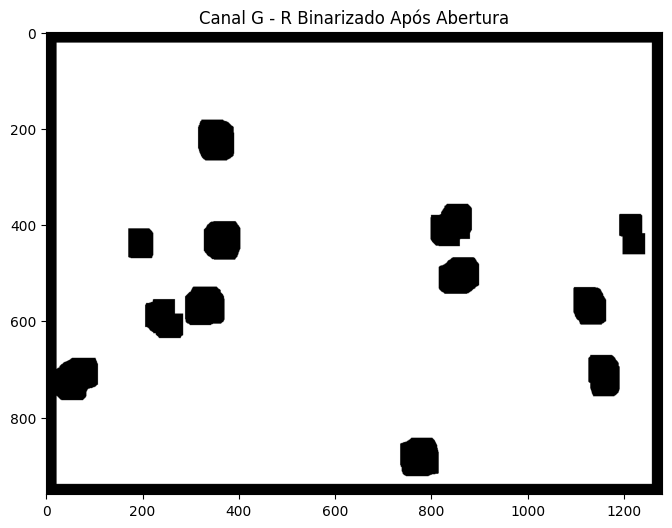

In [173]:
# Mostrar a imagem binarizada após as operações morfológicas
plt.figure(figsize=(8, 6))
plt.imshow(opened_B, cmap='gray')
plt.axis('on')
plt.title('Canal G - R Binarizado Após Abertura')
plt.show()

In [157]:
# SEUS CÓDIGOS AQUI

In [158]:
# SEUS CÓDIGOS AQUI

# Encontrando regiões conexas (conectividade-8)

In [174]:
# encontrando regiões

labels = measure.label(opened_B==0, connectivity=2)

num_regioes = labels.max()
print("Regiões encontradas:", num_regioes)

Regiões encontradas: 12


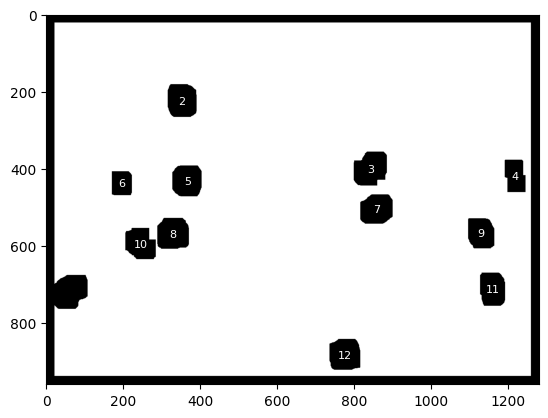

In [176]:
# rotulando regiões na imagem final

props = measure.regionprops(labels)

fig, ax = plt.subplots()
ax.imshow(opened_B, cmap='gray')
ax.axis('on')

for i, region in enumerate(props, start=1):
    # centróide da região (linha = y, coluna = x)
    y, x = region.centroid

    # desenha o número na imagem
    ax.text(x, y, str(i),
            color='white', fontsize=8, ha='center', va='center')